##Import Libraries

In [2]:
import torch
!pip install torchsummary
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import sys
import torch.nn as nn
import os

##Mount Google Drive to get files

In [3]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [4]:
!rm -rf '/content/drive/My Drive/colab_notebooks/S8/__pycache__'
!ls -lrt '/content/drive/My Drive/colab_notebooks/S8/'

total 10
-rw------- 1 root root 4074 Jan 30 15:04 resnet18.py
-rw------- 1 root root  594 Jan 30 15:04 visualise_loss_acc.py
-rw------- 1 root root 1211 Jan 30 15:04 train_test_loader.py
-rw------- 1 root root 1512 Jan 30 15:04 training.py
-rw------- 1 root root 1332 Jan 30 15:04 testing.py


##Add Google Drive path to system path

In [5]:
os.chdir('./drive/My Drive/colab_notebooks/S8/')

!ls

resnet18.py  training.py	   visualise_loss_acc.py
testing.py   train_test_loader.py


##Import python files

In [6]:
import train_test_loader as ttl
import resnet18 as bm
import training as trn
import testing as tst
import visualise_loss_acc as vis

##Main Function

In [7]:
def main(classes):

  train_loader, test_loader = ttl.get_train_test(classes)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

  model = bm.ResNet18().to(device)
  summary(model, input_size=(3, 32, 32))

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  # scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
  EPOCHS=25
 
  test_loss=[]
  test_accuracy=[]
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch + 1)
      train_losses,train_acc=trn.train(model, device, train_loader, optimizer,EPOCHS,criterion,l1=1e-6,l2=1e-3)
      # scheduler.step()
      test_losses,test_acc=tst.test(model, device, test_loader,criterion)

      test_loss.append(test_losses)
      test_accuracy.append(test_acc)
  
  vis.plot_acc_loss(test_loss,test_accuracy)
  print(test_loss)
  print(test_accuracy)

##Calling Main

CUDA Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
cuda


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

Loss=1.4554800987243652 Batch_id=390 Accuracy=54.01: 100%|██████████| 391/391 [01:02<00:00,  6.24it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6865/10000 (68.65%)

EPOCH: 2


Loss=1.2342027425765991 Batch_id=390 Accuracy=74.01: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0068, Accuracy: 7056/10000 (70.56%)

EPOCH: 3


Loss=1.031591534614563 Batch_id=390 Accuracy=80.33: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0055, Accuracy: 7672/10000 (76.72%)

EPOCH: 4


Loss=0.856549859046936 Batch_id=390 Accuracy=84.40: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 7995/10000 (79.95%)

EPOCH: 5


Loss=1.120437741279602 Batch_id=390 Accuracy=87.14: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7474/10000 (74.74%)

EPOCH: 6


Loss=0.8459108471870422 Batch_id=390 Accuracy=89.17: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0044, Accuracy: 8110/10000 (81.10%)

EPOCH: 7


Loss=0.8851698637008667 Batch_id=390 Accuracy=90.96: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8222/10000 (82.22%)

EPOCH: 8


Loss=0.8506431579589844 Batch_id=390 Accuracy=92.38: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8318/10000 (83.18%)

EPOCH: 9


Loss=0.6954053044319153 Batch_id=390 Accuracy=93.90: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0049, Accuracy: 8318/10000 (83.18%)

EPOCH: 10


Loss=0.7371916770935059 Batch_id=390 Accuracy=94.80: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 8074/10000 (80.74%)

EPOCH: 11


Loss=0.7912544012069702 Batch_id=390 Accuracy=95.65: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8334/10000 (83.34%)

EPOCH: 12


Loss=0.6554521918296814 Batch_id=390 Accuracy=96.33: 100%|██████████| 391/391 [01:05<00:00,  5.97it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8353/10000 (83.53%)

EPOCH: 13


Loss=0.688544511795044 Batch_id=390 Accuracy=96.72: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8445/10000 (84.45%)

EPOCH: 14


Loss=0.6740978956222534 Batch_id=390 Accuracy=97.18: 100%|██████████| 391/391 [01:05<00:00,  5.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0051, Accuracy: 8403/10000 (84.03%)

EPOCH: 15


Loss=0.6731309294700623 Batch_id=390 Accuracy=97.58: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8489/10000 (84.89%)

EPOCH: 16


Loss=0.7345080375671387 Batch_id=390 Accuracy=97.92: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8519/10000 (85.19%)

EPOCH: 17


Loss=0.6578119397163391 Batch_id=390 Accuracy=98.10: 100%|██████████| 391/391 [01:05<00:00,  5.98it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8358/10000 (83.58%)

EPOCH: 18


Loss=0.6222838759422302 Batch_id=390 Accuracy=98.41: 100%|██████████| 391/391 [01:05<00:00,  5.96it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0047, Accuracy: 8577/10000 (85.77%)

EPOCH: 19


Loss=0.692180871963501 Batch_id=390 Accuracy=98.61: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0054, Accuracy: 8454/10000 (84.54%)

EPOCH: 20


Loss=0.6141501069068909 Batch_id=390 Accuracy=98.48: 100%|██████████| 391/391 [01:05<00:00,  5.93it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 8517/10000 (85.17%)

EPOCH: 21


Loss=0.575255811214447 Batch_id=390 Accuracy=98.75: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8678/10000 (86.78%)

EPOCH: 22


Loss=0.6766101717948914 Batch_id=390 Accuracy=99.04: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8614/10000 (86.14%)

EPOCH: 23


Loss=0.5906966924667358 Batch_id=390 Accuracy=99.00: 100%|██████████| 391/391 [01:05<00:00,  5.94it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 8509/10000 (85.09%)

EPOCH: 24


Loss=0.6173804998397827 Batch_id=390 Accuracy=99.15: 100%|██████████| 391/391 [01:05<00:00,  5.92it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 8645/10000 (86.45%)

EPOCH: 25


Loss=0.6012450456619263 Batch_id=390 Accuracy=99.24: 100%|██████████| 391/391 [01:06<00:00,  5.91it/s]



Test set: Average loss: 0.0067, Accuracy: 8265/10000 (82.65%)

[[0.007196515136957168], [0.0067902309179306035], [0.005485207885503769], [0.004730406312644482], [0.006605810359120369], [0.004449677956104278], [0.004683941015601158], [0.0043479099422693256], [0.004925543141365051], [0.005678247545659542], [0.004598644599318504], [0.004950649508833885], [0.004642851257324219], [0.00510503711104393], [0.004817926347255707], [0.004712799367308617], [0.005387947648763656], [0.004654297772049904], [0.00538518628180027], [0.0050239691413939], [0.004783705604076385], [0.004794678069651127], [0.005299785849452019], [0.004826230329275131], [0.006696529138088226]]
[[68.65], [70.56], [76.72], [79.95], [74.74], [81.1], [82.22], [83.18], [83.18], [80.74], [83.34], [83.53], [84.45], [84.03], [84.89], [85.19], [83.58], [85.77], [84.54], [85.17], [86.78], [86.14], [85.09], [86.45], [82.65]]


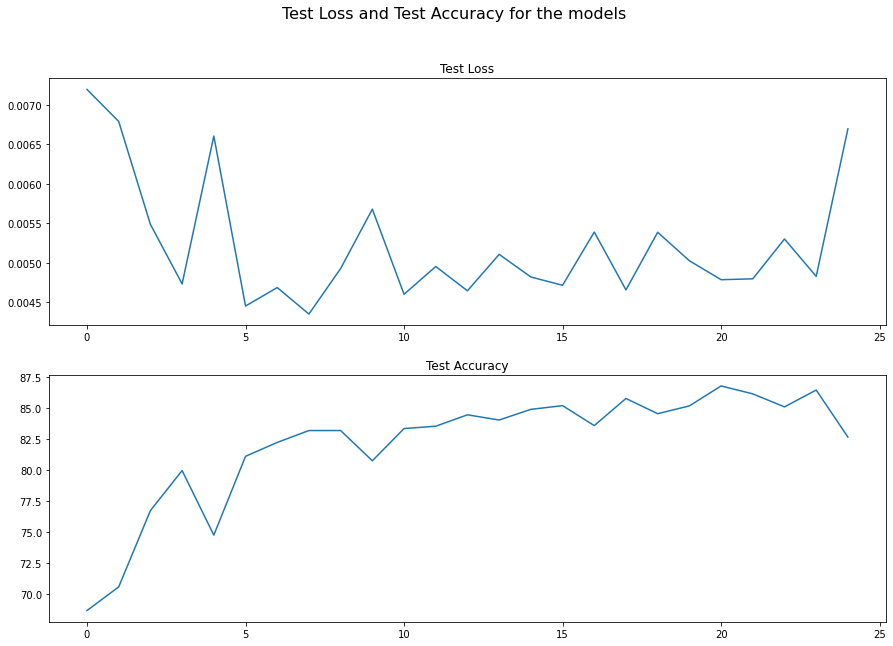

In [8]:
if __name__ == '__main__':
  from tqdm import tqdm
  if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()

  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')
  
  main(classes)